In [66]:
import pymysql
from konlpy.tag import Kkma, Okt
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from gensim import models
import collections
import re

In [2]:
binpath = 'D:Applications/Fasttext/cc.ko.300.bin.gz'

ko_model = models.fasttext.load_facebook_model(binpath)

In [159]:
db = pymysql.connect(
    user='root',
    passwd='jemenrapel',
    port=3306,
    host='localhost',
    db='movie_script',
    charset='utf8'
)

In [160]:
cursor = db.cursor(pymysql.cursors.DictCursor)

In [161]:
cursor.execute("""select 인물, 대사, 제목 from 7급공무원
union select 인물, 대사, 제목 from 8월의크리스마스
union select 인물, 대사, 제목 from ing
union select 인물, 대사, 제목 from m
union select 인물, 대사, 제목 from 대한민국헌법제1조
union select 인물, 대사, 제목 from 뜨거운것이좋아
union select 인물, 대사, 제목 from 러브레터
union select 인물, 대사, 제목 from 마이제너레이션
union select 인물, 대사, 제목 from 메멘토모리
union select 인물, 대사, 제목 from 박하사탕
union select 인물, 대사, 제목 from 싱글즈
union select 인물, 대사, 제목 from 오수정
union select 인물, 대사, 제목 from 우아한거짓말
union select 인물, 대사, 제목 from 거울속으로
              """)

9182

In [162]:
data = cursor.fetchall()

In [163]:
kkma = Kkma()

In [164]:
okt = Okt()

In [165]:
def cleanText(readData):
    text = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》"]', '', readData)
    return text

In [166]:
for i in data:
    i['대사'] = cleanText(i['대사'])
    i['대사'] = okt.morphs(i['대사'])

In [167]:
data

[{'인물': '수지', '대사': ['바쁘다고', '했잖아'], '제목': '7급공무원'},
 {'인물': '재준', '대사': ['오늘', '만나기로', '한', '거', '잊었어'], '제목': '7급공무원'},
 {'인물': '수지', '대사': ['어', '그게', '오늘', '이었어'], '제목': '7급공무원'},
 {'인물': '재준',
  '대사': ['중요하게', '할', '말', '있다고', '했잖아', '잠깐', '시간', '낼', '수', '있어'],
  '제목': '7급공무원'},
 {'인물': '수지',
  '대사': ['지금', '좀', '그런데', '미팅', '중이', '라', '내일', '얘기', '하면', '안', '될까'],
  '제목': '7급공무원'},
 {'인물': '재준',
  '대사': ['내일',
   '내일',
   '한',
   '게',
   '벌써',
   '한',
   '달',
   '반',
   '이야',
   '어디',
   '야',
   '내',
   '가',
   '그',
   '쪽',
   '으로',
   '갈게'],
  '제목': '7급공무원'},
 {'인물': '수지',
  '대사': ['아냐', '아냐', '오지', '마', '여기', '지금', '내', '가', '울릉도', '야'],
  '제목': '7급공무원'},
 {'인물': '재준',
  '대사': ['수지', '야', '오늘', '못', '보면', '영영', '못', '볼지도', '몰라'],
  '제목': '7급공무원'},
 {'인물': '수지',
  '대사': ['왜',
   '그래',
   '또',
   '재준아',
   '내',
   '가',
   '너',
   '사랑',
   '하는',
   '거',
   '알',
   '지',
   '다시',
   '전화',
   '할게',
   '끊어'],
  '제목': '7급공무원'},
 {'인물': '수지', '대사': ['그냥', '아는', '동생'], '제목': '7급공무원'},
 

In [201]:
new_dict = {}

for i in data:
    if i['인물'] + '_' + i['제목'] in new_dict:
        new_dict[i['인물'] + '_' + i['제목']].extend(i['대사'])
    if i['인물'] + '_' + i['제목'] not in new_dict: 
        new_dict[i['인물'] + '_' + i['제목']] = i['대사']

In [202]:
new_dict

{'수지_7급공무원': ['바쁘다고',
  '했잖아',
  '어',
  '그게',
  '오늘',
  '이었어',
  '지금',
  '좀',
  '그런데',
  '미팅',
  '중이',
  '라',
  '내일',
  '얘기',
  '하면',
  '안',
  '될까',
  '아냐',
  '아냐',
  '오지',
  '마',
  '여기',
  '지금',
  '내',
  '가',
  '울릉도',
  '야',
  '왜',
  '그래',
  '또',
  '재준아',
  '내',
  '가',
  '너',
  '사랑',
  '하는',
  '거',
  '알',
  '지',
  '다시',
  '전화',
  '할게',
  '끊어',
  '그냥',
  '아는',
  '동생',
  '이름',
  '박상호',
  '현',
  '국방',
  '과학',
  '기술',
  '연구원',
  '특수',
  '무기',
  '개발',
  '팀',
  '팀',
  '장',
  '한국',
  '군',
  '신형',
  'K',
  '2',
  '흑표',
  '전차',
  '의',
  '능',
  '동방',
  '호',
  '유도',
  '교란',
  '장치',
  '및',
  '전술',
  '정보',
  '처리장치',
  '를',
  '서아프리카',
  '무기',
  '중개',
  '상인',
  '코드명',
  'X',
  '에게',
  '넘기려',
  '한다는',
  '첩보',
  '를',
  '입수',
  '하여',
  '공무',
  '중',
  '입니다',
  '잠깐',
  '탑시다',
  '공무',
  '수행',
  '하는',
  '거',
  '안',
  '보여요',
  '자',
  '봐요',
  '됐죠',
  '재준아',
  '너',
  '가면',
  '죽어',
  '야',
  '어딨어',
  '이재준',
  '야',
  '이',
  '나쁜',
  '새끼',
  '야',
  '내',
  '가',
  '너',
  '사랑',
  '한',
  '다니까',
  '죽었어',
  '씨',
  '감히',

In [197]:
new_dict.keys()

dict_keys(['수지_7급공무원', '재준_7급공무원', '사진사_7급공무원', '홍팀장_7급공무원', '요원_7급공무원', '관리_7급공무원', '전화_7급공무원', '무전_7급공무원', '뉴스_7급공무원', '조부장_7급공무원', '상봉_7급공무원', '삼성맨_7급공무원', '세균_7급공무원', '연구원_7급공무원', '노박사_7급공무원', '장순경_7급공무원', '원석_7급공무원', '오실장_7급공무원', '동료1_7급공무원', '남학생1_7급공무원', '남학생들_7급공무원', '동료_7급공무원', '빅또르_7급공무원', '미카엘_7급공무원', '앵커_7급공무원', '꼬마_7급공무원', '나타샤_7급공무원', '순경_7급공무원', '황경감_7급공무원', '감찰반_7급공무원', '여자_7급공무원', '해병복_7급공무원', '유리_7급공무원', '시어머니_7급공무원', '기자_7급공무원', '소리_8월의크리스마스', '다른소리_8월의크리스마스', '여자_8월의크리스마스', '다림_8월의크리스마스', '정원_8월의크리스마스', '철구_8월의크리스마스', '아버지_8월의크리스마스', '중학생 1_8월의크리스마스', '중학생 2_8월의크리스마스', '중학생 3_8월의크리스마스', '사내아이_8월의크리스마스', '정숙_8월의크리스마스', '석희_8월의크리스마스', '지원_8월의크리스마스', '효정_8월의크리스마스', '남자_8월의크리스마스', '경찰관_8월의크리스마스', '며느리_8월의크리스마스', '철이_8월의크리스마스', '할머니_8월의크리스마스', '민구_8월의크리스마스', '철_8월의크리스마스', '나레이션_8월의크리스마스', '미숙_ing', '민아_ing', '선생님_ing', '학생 1_ing', '학생 2_ing', '담임_ing', '손님_ing', '미숙 친구_ing', '파출부 할머니_ing', '영재_ing', '점원_ing', '아빠_ing', '경비_ing', '간호사 언니_ing', '여종업원_ing', '아주머니_ing', '물병자

In [203]:
for key, val in new_dict.items():
    new_dict[key] = collections.Counter(val).most_common(1000)


In [208]:
new_dict['수지_7급공무원']

[('가', 154),
 ('이', 70),
 ('내', 58),
 ('야', 54),
 ('너', 54),
 ('왜', 50),
 ('도', 50),
 ('은', 48),
 ('나', 48),
 ('언니', 40),
 ('을', 40),
 ('아냐', 38),
 ('다', 38),
 ('안', 36),
 ('한', 36),
 ('해', 36),
 ('번', 36),
 ('지금', 34),
 ('거', 34),
 ('니', 34),
 ('는', 34),
 ('로', 34),
 ('마', 32),
 ('에', 28),
 ('놈', 28),
 ('으로', 26),
 ('줄', 26),
 ('사랑', 24),
 ('뭐', 24),
 ('하지', 24),
 ('그', 24),
 ('를', 22),
 ('들', 22),
 ('요', 22),
 ('게', 22),
 ('거야', 22),
 ('우리', 22),
 ('여기', 20),
 ('말', 20),
 ('못', 20),
 ('랑', 20),
 ('아', 20),
 ('넌', 20),
 ('좀', 18),
 ('얘기', 18),
 ('알', 18),
 ('나쁜', 18),
 ('남자', 18),
 ('까지', 18),
 ('하고', 18),
 ('재준아', 16),
 ('하는', 16),
 ('네', 16),
 ('생각', 16),
 ('할', 16),
 ('진짜', 16),
 ('다시', 14),
 ('전화', 14),
 ('그런', 14),
 ('없어', 14),
 ('더', 14),
 ('팡', 14),
 ('시브', 14),
 ('하면', 12),
 ('울릉도', 12),
 ('지', 12),
 ('씨', 12),
 ('이라', 12),
 ('여자', 12),
 ('된', 12),
 ('백신', 12),
 ('있습니다', 12),
 ('것', 12),
 ('생일', 12),
 ('이야', 12),
 ('회계사', 12),
 ('어떻게', 12),
 ('인', 12),
 ('그만', 12),
 ('오늘', 10)

In [209]:
new_dict['나난_싱글즈']

[('이', 188),
 ('가', 148),
 ('나', 100),
 ('에', 98),
 ('왜', 82),
 ('내', 82),
 ('야', 72),
 ('뭐', 64),
 ('해', 62),
 ('거', 58),
 ('을', 56),
 ('결혼', 56),
 ('은', 56),
 ('너', 56),
 ('안', 56),
 ('하고', 54),
 ('는', 52),
 ('그', 50),
 ('도', 50),
 ('아', 46),
 ('것', 44),
 ('말', 44),
 ('네', 41),
 ('고', 40),
 ('만', 40),
 ('다', 40),
 ('할', 38),
 ('게', 38),
 ('난', 38),
 ('들', 36),
 ('를', 36),
 ('정준', 36),
 ('하는', 32),
 ('니', 32),
 ('잘', 32),
 ('애', 32),
 ('한', 30),
 ('그럼', 30),
 ('이야', 28),
 ('둘', 28),
 ('거야', 28),
 ('돼', 28),
 ('좀', 26),
 ('아냐', 26),
 ('수', 26),
 ('인간', 24),
 ('못', 24),
 ('두', 24),
 ('너무', 24),
 ('동미', 24),
 ('의', 24),
 ('근데', 22),
 ('했다', 22),
 ('지', 22),
 ('남자', 22),
 ('응', 20),
 ('그래', 20),
 ('정말', 20),
 ('준', 20),
 ('넌', 20),
 ('사람', 20),
 ('줄', 18),
 ('일', 18),
 ('생각', 18),
 ('이다', 16),
 ('까지', 16),
 ('하나', 16),
 ('누가', 16),
 ('눈', 14),
 ('걔', 14),
 ('날', 14),
 ('때', 14),
 ('에서', 14),
 ('년', 14),
 ('요', 14),
 ('한테', 14),
 ('살', 14),
 ('지금', 14),
 ('몰라', 14),
 ('그건', 12),
 ('밥', 12)

In [189]:
path = 'C:/Windows/Fonts/NGULIM.ttf'
fontprop = fm.FontProperties(fname=path, size = 30)

In [273]:
com_list = []
com_count_list = []
for key, val in new_dict.items():
    if key == '수지_7급공무원':
        수지_word = [x[0] for x in val]
        수지_count = [x[1] for x in val]
    if key == '나난_싱글즈':
        나난_word = [x[0] for x in val]
        나난_count = [x[1] for x in val]
for i in 수지_word[:100]:
    if i in 나난_word[:100]:
        com_list.append(i)
        com_count_list.append([수지_count[수지_word.index(i)],나난_count[나난_word.index(i)]])

In [274]:
len(com_list)

53

In [265]:
com_list = com_list[:100]

In [266]:
com_count_list = com_count_list[:100]

In [269]:
수지 = {}
나난 = {}
for i in com_list:
    수지[i] = com_count_list[com_list.index(i)][0]
    나난[i] = com_count_list[com_list.index(i)][1]

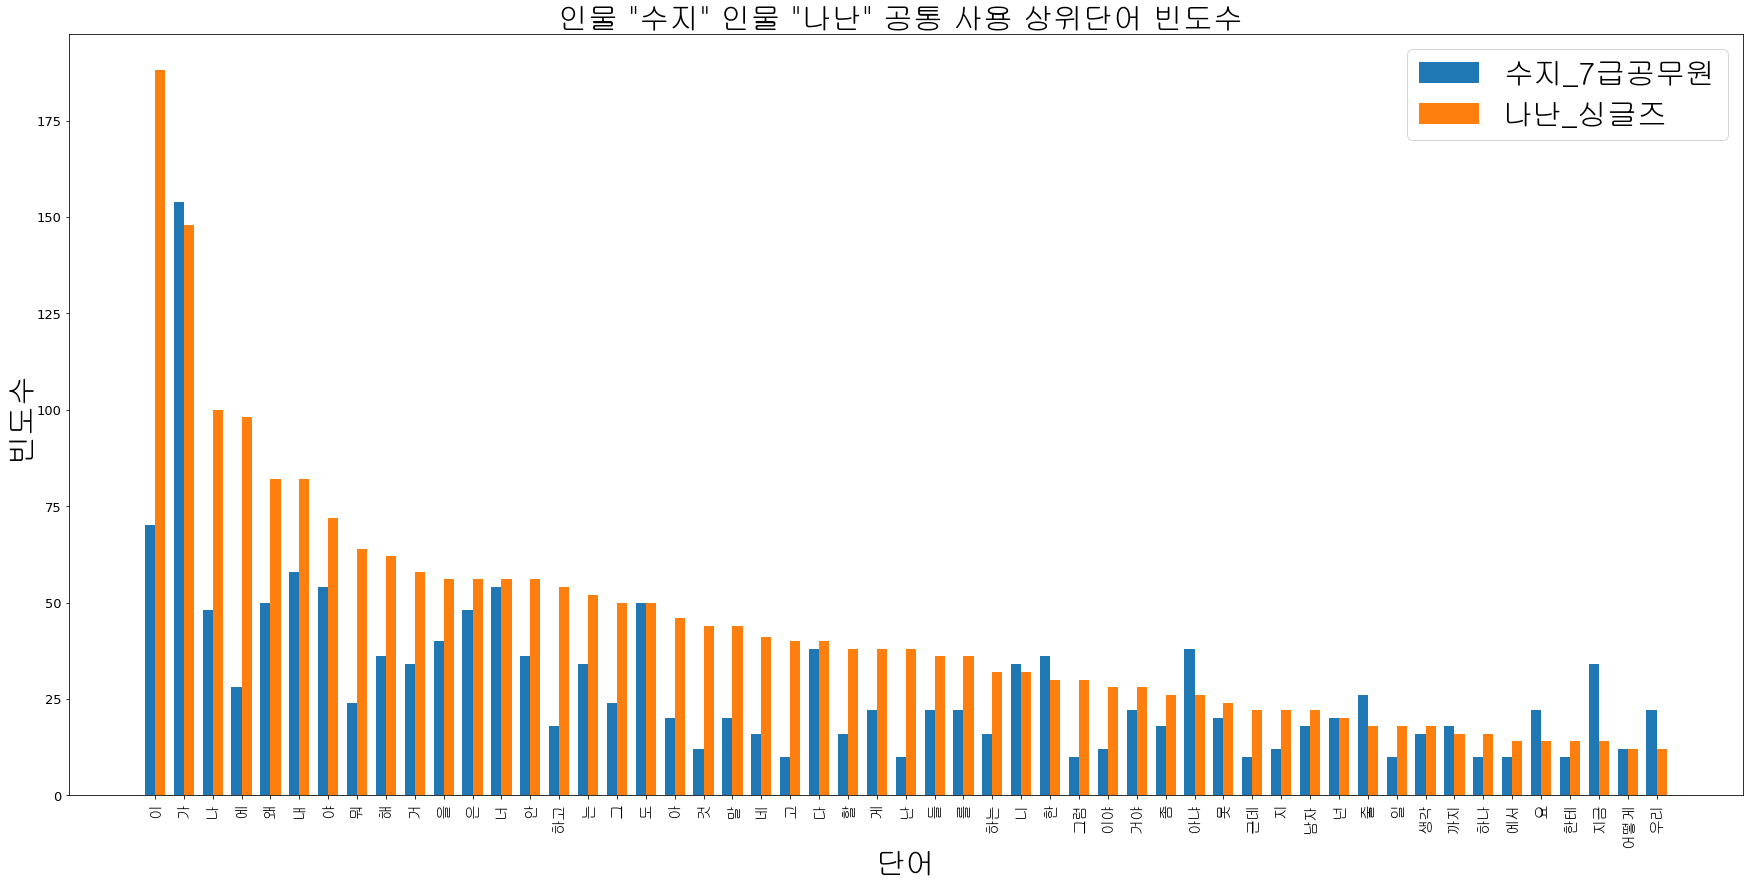

In [276]:
width = 0.35
x = np.arange(len(com_list))
plt.figure(figsize=(30,14))
plt.bar(x, 수지.values(), width, label='수지_7급공무원')
plt.bar(x+width, 나난.values(),width, label = '나난_싱글즈')
plt.xlabel("단어",fontproperties=fontprop, fontsize=30)
plt.ylabel("빈도수",fontproperties=fontprop, fontsize=30)
plt.title("인물 \"수지\" 인물 \"나난\" 공통 사용 상위단어 빈도수 ",fontproperties=fontprop, fontsize=30)

plt.xticks(x+width/2,수지.keys(),fontproperties=fontprop, rotation=90, fontsize=15)
    #     plt.xticks(fontsize=13, fontproperties=fontprop)
plt.yticks(fontsize=13)
plt.legend(prop=fontprop)

plt.show()

In [171]:
def centeroidnp(arr):
    length = arr.shape[0]
    sum_x = np.sum(arr[:, 0])
    sum_y = np.sum(arr[:, 1])
    return sum_x/length, sum_y/length

In [175]:
emb_dict = {}
for key, val in new_dict.items():
    n_vec=[]
    for i in val:
        n_vec.append(ko_model.wv.word_vec(i[0]))
    emb_dict[key] = n_vec

In [176]:
for key, val in emb_dict.items():
    emb_dict[key] = np.array(val)

In [178]:
for key, val in emb_dict.items():
    emb_dict[key] = np.reshape(val,(-1,2))

In [180]:
for key, val in emb_dict.items():
    emb_dict[key] = centeroidnp(val)

In [181]:
emb_dict

{'수지_7급공무원': (-5.5963865915934245e-05, 0.003588678741455078),
 '재준_7급공무원': (0.0010157378514607748, 0.004224822998046875),
 '사진사_7급공무원': (-0.0005002064931960333, 0.0038338606698172435),
 '홍팀장_7급공무원': (0.0010698928833007813, 0.003535136159261068),
 '요원_7급공무원': (-0.0074660070737202966, 0.007347640196482341),
 '관리_7급공무원': (-0.003951144536336263, 0.007000125249226888),
 '전화_7급공무원': (-0.0016553099950154622, 0.003266830841700236),
 '무전_7급공무원': (-0.0033920978364490326, 0.003705991472516741),
 '뉴스_7급공무원': (-0.002805248631371392, 0.006493270662095812),
 '조부장_7급공무원': (-0.0012636661529541015, 0.0028060211181640624),
 '상봉_7급공무원': (-0.0005601290384928385, 0.003894451141357422),
 '삼성맨_7급공무원': (-0.0004091780344645182, 0.004852338155110677),
 '세균_7급공무원': (0.0006830336252848307, 0.005954957071940104),
 '연구원_7급공무원': (0.017307028770446778, -0.0011824248234430948),
 '노박사_7급공무원': (0.0004912266413370769, 0.004094013977050781),
 '장순경_7급공무원': (0.0017009473314472273, 0.003417530059814453),
 '원석_7급공무원': (0.00168

In [153]:
pca = PCA(n_components=2)

In [157]:
for key, val in new_dict.items():
    new_dict[key] = centeroidnp(pca.fit_transform(val))

ValueError: n_components=2 must be between 0 and min(n_samples, n_features)=1 with svd_solver='full'

No handles with labels found to put in legend.


TypeError: __init__() got an unexpected keyword argument 'marker'

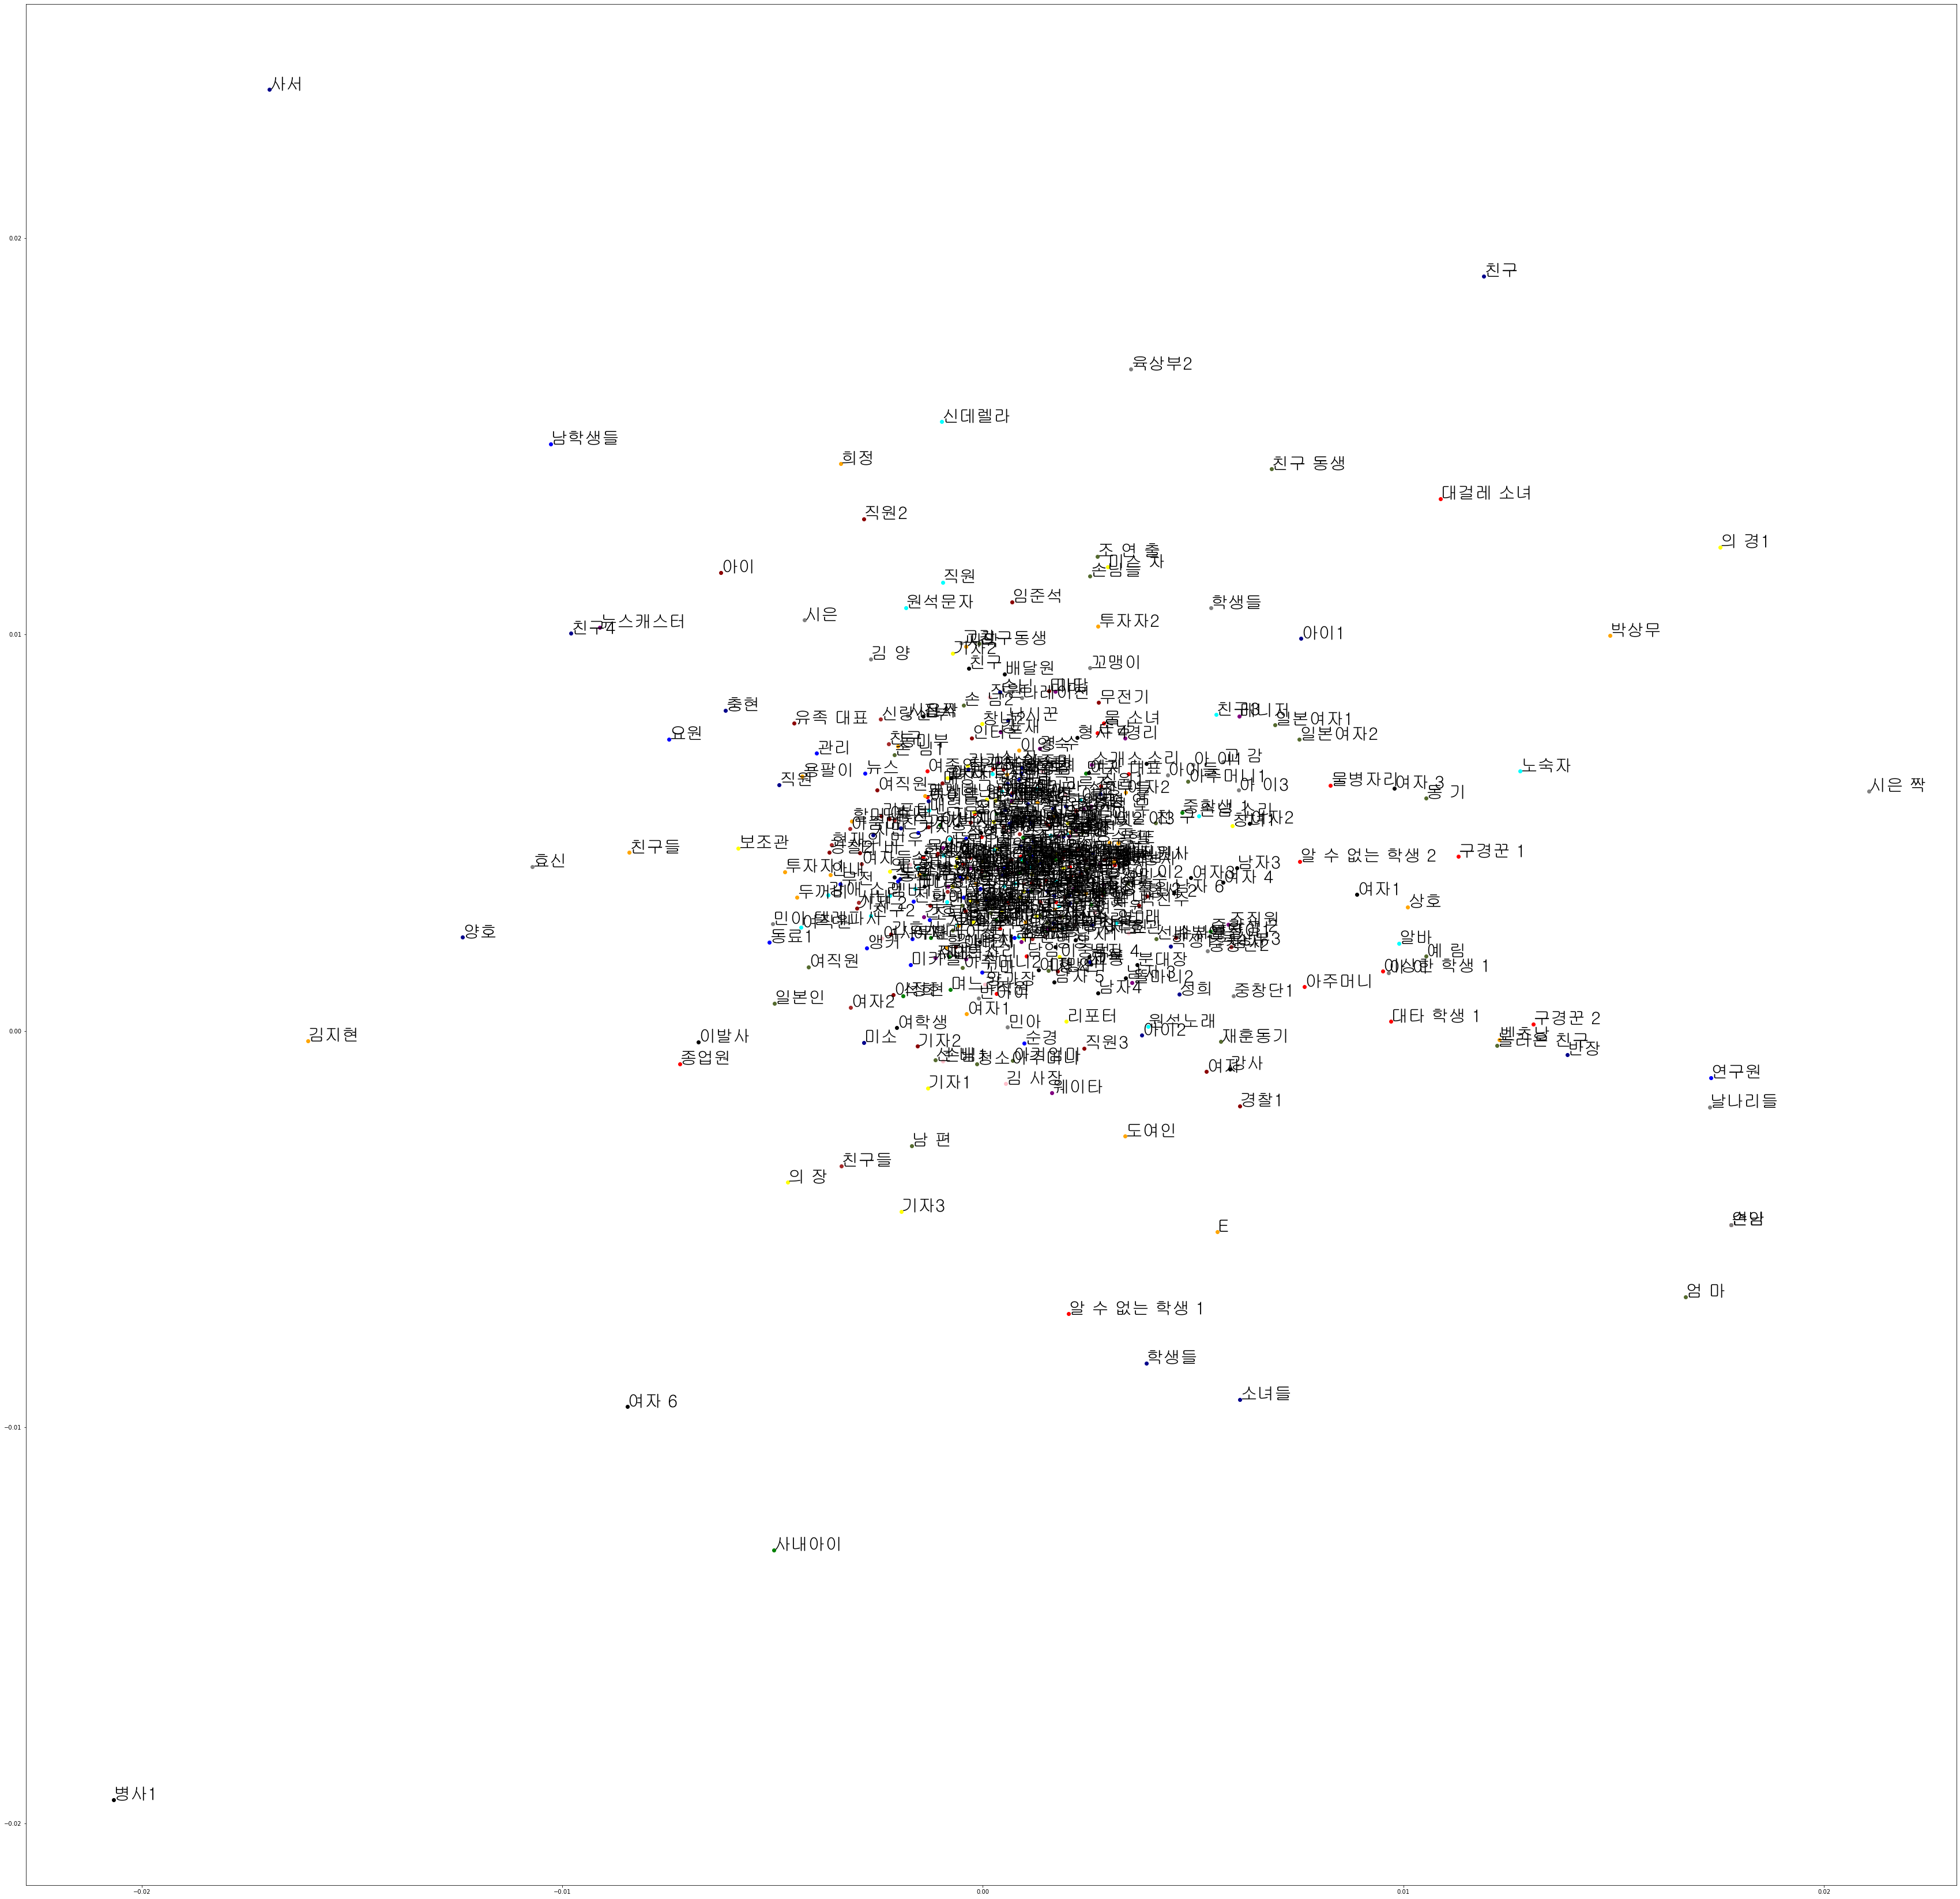

In [195]:
plt.figure(figsize=(60, 60))
for key, val in emb_dict.items():
    if '7급공무원' in key:
        plt.scatter(val[0], val[1], marker='o', c="blue")
    if '8월의크리스마스' in key:
        plt.scatter(val[0], val[1], marker='o', c="green")
    if 'ing' in key:
        plt.scatter(val[0], val[1], marker='o', c="red")
    if 'm' in key:
        plt.scatter(val[0], val[1], marker='o', c="brown")
    if '대한민국헌법제1조' in key:
        plt.scatter(val[0], val[1], marker='o', c="yellow")
    if '뜨거운것이좋아' in key:
        plt.scatter(val[0], val[1], marker='o', c="cyan")
    if '러브레터' in key:
        plt.scatter(val[0], val[1], marker='o', c="purple")
    if '마이제너레이션' in key:
        plt.scatter(val[0], val[1], marker='o', c="pink")
    if '메멘토모리' in key:
        plt.scatter(val[0], val[1], marker='o', c="gray")
    if '박하사탕' in key:
        plt.scatter(val[0], val[1], marker='o', c="black")
    if '싱글즈' in key:
        plt.scatter(val[0], val[1], marker='o', c="orange")
    if '오수정' in key:
        plt.scatter(val[0], val[1], marker='o', c="darkolivegreen")
    if '우아한거짓말' in key:
        plt.scatter(val[0], val[1], marker='o', c="darkblue")
    if '거울속으로' in key:
        plt.scatter(val[0], val[1], marker='o', c="darkred")
for i, v in enumerate(emb_dict):
    split_string = v.split("_", 1)
    substring = split_string[0]
    plt.annotate(substring, xy=(emb_dict[v][0], emb_dict[v][1]), fontproperties=fontprop)
plt.legend(marker='o', c="blue")

In [155]:
test

array([[-4.01786192e-01, -4.27701673e-01],
       [-2.71933114e-01, -1.35885517e-01],
       [ 1.42482980e-01,  9.85410967e-02],
       [ 5.78494451e-01,  2.60337367e-01],
       [ 1.25858354e+00,  4.20633187e-01],
       [ 1.08018613e-01,  4.23187594e-01],
       [-3.31719874e-01, -4.67701408e-01],
       [-5.03565435e-01, -5.28928009e-01],
       [ 1.26806149e-01, -1.03358168e-01],
       [ 9.60246480e-01, -2.94072568e-01],
       [-6.17611639e-01, -6.86321428e-01],
       [ 7.26805399e-01,  1.01024941e+00],
       [-1.99752013e-01,  7.66027453e-02],
       [-1.65613728e-01,  3.19964633e-01],
       [-4.87366902e-01,  1.28817413e-01],
       [-4.55906167e-01,  2.30300681e-01],
       [-3.78813187e-01, -1.45704119e-01],
       [ 1.62820076e-02,  1.52431408e-01],
       [ 4.07765007e-01,  5.03005589e-01],
       [ 9.59767009e-01,  2.13772684e-01],
       [-3.58784706e-01, -3.22254892e-01],
       [-5.28599444e-01, -6.92580398e-01],
       [ 4.74663173e-01,  3.27847691e-01],
       [-5.